<h3>Interaction plots

<h3> Import Libraries

In [3]:
from functools import partial
import os
import pandas as pd

import json
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
from new_plot import *
set_things()
set_font()
from sklearn.model_selection import train_test_split

C:\Users\USER\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\USER\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\USER\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\USER\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\USER\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam 

In [3]:
import matplotlib
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import copy

colors = ["white", "magenta", "brown", "darkgreen"]
nodes = [0.0, 0.2, 0.5, 1.0]
cmap1 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

In [4]:
from shap_tools import *

Imports ^
Definitions ^



The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


<h3> Reading property data

In [5]:
propfilename ='Hardness_RT'
prop = 'Hardness_RT'

In [6]:
df = pd.read_csv(propfilename+'.csv')
data = df.values
X_features = data[:,0:-1]
Y_properties = data[:,-1]

sa = df.columns.values.tolist()
sa.remove(prop)
a10 = sa

X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_properties,test_size=0.2, random_state=42)

np.savetxt('00_Pipeline_P1_Node_train_test_split_train_split_X.csv', X_train, delimiter = ",")
np.savetxt('00_Pipeline_P1_Node_train_test_split_test_split_X.csv', X_test, delimiter = ",")
np.savetxt('00_Pipeline_P1_Node_train_test_split_train_split_y.csv', Y_train, delimiter = ",")
np.savetxt('00_Pipeline_P1_Node_train_test_split_test_split_y.csv', Y_test, delimiter = ",")

In [7]:
xtrain='00_Pipeline_P1_Node_train_test_split_train_split_X.csv'
xtest='00_Pipeline_P1_Node_train_test_split_test_split_X.csv'

ytrain='00_Pipeline_P1_Node_train_test_split_train_split_y.csv'
ytest='00_Pipeline_P1_Node_train_test_split_test_split_y.csv'

In [8]:
def lo(file):

    """
    folder=path where input files are stored
    file=name of file to be read
    
    """
    #path = os.path.join(folder,file)
    df = pd.read_csv(file)
    return df

In [9]:
dxtrain = lo(xtrain)
dytrain = lo(ytrain)

dxtest = lo(xtest)
dytest = lo(ytest)

In [10]:
#Decreasing order of Interaction, currently manually done but can just read file and do it
descending = ['Cu',
 'Ge',
 'As',
 'Fe',
 'Se',
 'Ni',
 'S',
 'Te',
 'Ga',
 'B',
 'Zr',
 'P',
 'Tl',
 'Cd',
 'Si',
 'Sb',
 'Ba',
 'Pb',
 'Al',
 'Zn',
 'In',
 'Sn',
 'Nb',
 'Ti',
 'La',
 'Bi',
 'C',
 'Y',
 'Co',
 'Hg',
 'Mo',
 'Mg',
 'Ho']

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


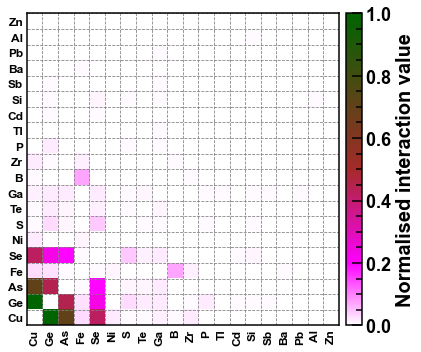

In [11]:
folder_name = ''
colors = ["white", "magenta", "brown", "darkgreen"]
nodes = [0.0, 0.2, 0.5, 1.0]
cmap1 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

y = dytrain
X = dxtrain
X.columns =X.columns.tolist()
top=20
if top>X.shape[1]:
    top = X.shape[1]
#ivs_file = "IVS/{}_ivs.pkl".format(prop)
ivs = loadfile(propfilename+'_ivs.pkl')
mean = 0#np.mean(y)
std = 1#np.std(y)
N = ivs.shape[0]
X = X.iloc[:N]
y = y[:N]

vs = ivs.sum(2)

IVS = np.abs(ivs).mean(0)
IVS[np.diag_indices_from(IVS)] = 0  # diagonal matrix zero 
VS = np.abs(ivs.sum(2)).mean(0)

mask_top = np.argsort(np.abs(VS[:-1]))[::-1][:top] 

data_ = IVS[:-1,:-1]
data_ = data_[:, mask_top]
data_ = data_[mask_top, :]
data_ /= data_.max()
#print(IVS)
set_tick('off')
fig, ax = plt.subplots()
# plt.title(prop_names[prop], verticalalignment='bottom')
cb = plt.imshow(data_, cmap=cmap1, vmin=0)
plt.grid('on', color="gray", ls="--", which="minor", alpha=1.)
#decending--> List of elements with descending values
if len(descending)>=20:
    descending = descending[:20]
comps =[i for i in descending]
#comps.append(' ')#[mask_top]]# [fix_comp2(i) for i in X.columns[mask_top]] #df
yticks(range(len(data_)), labels=comps, size=12)
xticks(range(len(data_)), labels=comps, size=12, rotation=90)

# yticks(range(len(data_)), labels=comps[:-1], size=12)
# xticks(range(len(data_)), labels=comps[:-1], size=12, rotation=90)



from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(cb, cax=cax, label="Normalised interaction value")
#ax.set_title(prop)
#plt.savefig(prop+'_interaction_plot.png', dpi=1200)
plt.show()
# save2file("IVS/{}_ivs.pfig".format(prop), fig)